In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')
from scipy import stats

## 중심위치의 측도
- 평균(mean)
- 중앙값(median)
- 최빈값(mode) : 관측값들 중 가장 많이 나오는값
    - 이산형/범주형 자료에서 많이 사용

In [3]:
'''
평균 : np.mean()
중앙값 : np.median()
    ㄴ 자료의 개수가 홀수인 경우 (n+1)/2 의 관측값
    ㄴ 자료의 개수가 짝수인 경우 n/2 와 (n+1)/2 관측값의 평균
최빈값 : stats.mode()
'''

coffee = np.array([202, 177, 121, 148, 89, 121, 137, 158])
print(f"평균 : {np.mean(coffee).round(2)}")
print(f"중앙값 : {np.median(coffee).round(2)}")

cf_mode = stats.mode(coffee)
print(cf_mode)
print(f"최빈값 : {cf_mode[0]}")

평균 : 144.12
중앙값 : 142.5
ModeResult(mode=np.int64(121), count=np.int64(2))
최빈값 : 121


## 퍼진 정도의 측도
중심 위치만으로 분포를 파악하기에 부족할 때 `분산, 표준편차, 범위, 사분위수`등을 퍼진 정도의 측도로 사용하여 관측
- **분산** : 자료가 얼마나 흩어졌는지 숫자로 표현, 각 관측값이 평균으로부터 떨어진정도
- **표준편차** : 분산의 양의 제곱근을 표준편차라 하고 보통 s로 표기한다.
- **범위** : 관측값 중 가장 큰 값과 가장 작은 값의 차이
- **백분위수** : 중앙값을 확장한 개념으로, 자료를 순서대로 정리하였을 때 백분율로 특정 위치의 값을 표현한다.
- **사분위수의** 범위(IQR) : 제3사분위수(75)와 1사분위수(25) 사이의 거리

    - 평균의 특징 == 표준편차의 특징
    - 중앙값의 특징 == 사분위수의 특징

- **변동계수** : 퍼진 정도를 상대적으로 나타내는 수치 `CV = 표준편차 / 평균`

In [43]:
'''
분산 : variance()
표준편차 : stdev()
범위 : np.max() - np.min()
백분위수 : np.percentile()
사분위수 : np.percentile(a, 25) / np.percentile(a,50) / np.percentile(a,75)
'''
from statistics import variance, stdev


coffee = np.array([202, 177, 121, 148, 89, 121, 137, 158])
print(type(coffee))
print(f"분산 : {variance(coffee).round(2)}")
print(f"표준편차 : {stdev(coffee.tolist()):.2f}")
cf_range = np.max(coffee, axis=0) - np.min(coffee, axis=0)
print("범위 :", cf_range)
print("백분위수 :", np.percentile(coffee,20))
print("제3사분위수(Q3) :", np.percentile(coffee,75))
print("제1사분위수(Q1) :", np.percentile(coffee,25))
print("이상치(IOR) :", np.percentile(coffee,75)- np.percentile(coffee,25))
print("변동계수 :",  round(stdev(coffee.tolist()) / np.mean(coffee),2))





<class 'numpy.ndarray'>
분산 : 1256
표준편차 : 35.45
범위 : 113
백분위수 : 121.0
제3사분위수(Q3) : 162.75
제1사분위수(Q1) : 121.0
이상치(IOR) : 41.75
변동계수 : 0.25


In [ ]:
'''
도수분포표 
pd.cut(시리즈, 구간수) : 데이터를 동일한 간격의 구간으로 나눠서 각 값이 어느 구간에 속하는지 알려줌.
'''

drink_cup = pd.DataFrame({
    "cup": [22, 7, 19, 3, 10, 8, 19, 7, 15, 9, 35, 5], 
    "who": ["A", "E", "D", "B", "C", "A", "A", "A", "D", "B", "C", "B"]
})

factor_cup = pd.cut(drink_cup.cup, 4)
group_cup = drink_cup["cup"].groupby(factor_cup, observed=True)
count_cup = group_cup.agg(["count"])

print(count_cup)

               count
cup                 
(2.968, 11.0]      7
(11.0, 19.0]       3
(19.0, 27.0]       1
(27.0, 35.0]       1


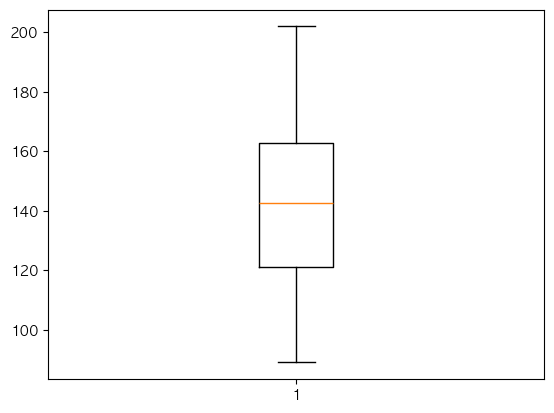

In [ ]:
'''
박스플롯 : plt.boxplot() - 다섯가지 요약수치(최솟값, Q1, Q2, Q3, 최댓값)을 그림으로 표현
산점도 : plt.scatter(x, y) - x:x축변수, y:y축변수
'''

coffee = np.array([202, 177, 121, 148, 89, 121, 137, 158])

fig, axes = plt.subplots()

plt.boxplot(coffee)
plt.show()

In [ ]:
'''
공분산 : df.cov()
    ㄴ 두 변수 (x,y)에 대하여 서로 어떤 관계를 가지는지 나타낸다.
    ㄴ x,y값이 같은 방향으로 변화하면 공분산 값은 양수 
    ㄴ x,y값이 다른 방향으로 변화하면 공분산 값은 음수

상관계수 : df.corr()
    ㄴ 표본상관계수 r은 항상 -1과 1사이에 있음
    ㄴ 절댓값의 크기는 직선관계에 가까운 정도를 나타낸다
    ㄴ 부호는 직선관계의 방향을 나타낸다
    ㄴ 상관계수는 단위가 없으며, 상관계수만으로 판단 시 잘못된 해석 가능성이높다 (직선이 아닌 경우 부적합)
    ㄴ 산점도를 먼저보고 전체의 경향을 파악한 뒤, 상관계수를 계산해야한다.
'''